# Diabetes Classification Using Pima Indians Diabetes Dataset
![Diabetes Classification](diabetes_classification.png)

Estimated time needed: **30** minutes


## Lab objectives

In this lab, you will:

1. **Load the Pima Indians Diabetes Dataset** from a CSV file
2. **Display the top 5 rows** to understand the data structure
3. **Identify input features (X) and target variable (y)** for prediction
4. **Choose a machine learning algorithm** suitable for medical diagnosis
5. **Train the model** using the dataset
6. **Print the accuracy** and evaluate model performance
7. **Make predictions** on new patient data


## About the dataset

The Pima Indians Diabetes Dataset contains medical information about female patients of Pima Indian heritage, aged 21 and older. This dataset is widely used in medical machine learning research to predict diabetes onset.

**Features include:**
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function (genetic factor)
- Age: Age in years
- Outcome: 0 (no diabetes) or 1 (diabetes)

---

## Step 1: Import required libraries

First, you need to import the Python libraries that will help you work with data and machine learning. Think of these as specialized medical tools for data analysis.

In [98]:
# Import pandas for data manipulation (like Excel for Python)
import pandas as pd

In [99]:
# Import numpy for numerical operations
import numpy as np

In [100]:
# Import machine learning tools from scikit-learn
from sklearn.model_selection import train_test_split

In [101]:
# Import the machine learning algorithm
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Import evaluation metrics for measuring model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
# Import matplotlib for creating graphs and charts
import matplotlib.pyplot as plt

In [104]:
# Import seaborn for better-looking statistical plots
import seaborn as sns

In [105]:
# Set up the plotting style for better visualization
plt.style.use('default')
sns.set_palette("husl")

In [106]:
# Confirm all libraries are loaded successfully
print("All libraries imported successfully!")
print("Ready to begin diabetes classification analysis.")

All libraries imported successfully!
Ready to begin diabetes classification analysis.


## Step 2: Load dataset from the CSV file

You will load the Pima Indians Diabetes Dataset directly from a csv file.

In [107]:
# Define the csv_file path where the dataset is stored on the disk
csv_file = "diabetes.csv"

In [108]:
# Load the dataset from csv file into a pandas DataFrame
diabetes_data = pd.read_csv(csv_file)
# Confirm dataset loaded successfully
print("Dataset loaded successfully")

Dataset loaded successfully


In [109]:
# Display basic information about the dataset
print(f"Dataset contains {len(diabetes_data)} patient records.")
print(f"Dataset contains {len(diabetes_data.columns)} features per patient.")

Dataset contains 768 patient records.
Dataset contains 9 features per patient.


## Step 3: Display the top 5 rows

Let's examine the first few patient records to understand what the data looks like. This is similar to reviewing the first few patient files in a medical study.

In [110]:
# Display the first 5 rows of the dataset
print("=== FIRST 5 PATIENT RECORDS ===")
# Show the actual patient data
diabetes_data.head()

=== FIRST 5 PATIENT RECORDS ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
# Display summary information about the dataset
print("\n=== DATASET INFORMATION ===")
print(f"Total number of patients: {len(diabetes_data)}")


=== DATASET INFORMATION ===
Total number of patients: 768


In [112]:
# Count features and diabetes cases
print(f"Number of features per patient: {len(diabetes_data.columns) - 1}")
print(f"Number of patients with diabetes: {sum(diabetes_data['Outcome'] == 1)}")

Number of features per patient: 8
Number of patients with diabetes: 268


In [113]:
# Count patients without diabetes
print(f"Number of patients without diabetes: {sum(diabetes_data['Outcome'] == 0)}")

Number of patients without diabetes: 500


## Additional data exploration

Let's get a better understanding of the patient data by looking at basic statistics and checking for any data quality issues.

In [114]:
# Display basic statistical information about each feature
print("=== BASIC STATISTICS FOR ALL FEATURES ===")
diabetes_data.describe()

=== BASIC STATISTICS FOR ALL FEATURES ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [115]:
# Check for missing values (important in medical data)
print("\n=== MISSING VALUES CHECK ===")
missing_values = diabetes_data.isnull().sum()


=== MISSING VALUES CHECK ===


In [116]:
# Report on missing values status
if missing_values.sum() == 0:
    print("Good news: No missing values found in the dataset.")
else:
    print("Missing values found:", missing_values[missing_values > 0])

Good news: No missing values found in the dataset.


## Step 4: Identify input features (X) and target variable (y)

In medical prediction, separate:
- **Input features (X)**: The medical measurements you use to make predictions (like symptoms and test results)
- **Target variable (y)**: What you want to predict (diabetes diagnosis: yes or no)

In [117]:
# X contains all the medical measurements (features) you will use for prediction
X = diabetes_data.drop(columns=['Outcome'])

In [118]:
# y contains the diagnosis results (0 = no diabetes, 1 = diabetes)
y = diabetes_data['Outcome']

In [119]:
# Display information about input features
print("=== INPUT FEATURES (X) ===")
print("These are the medical measurements you will use to predict diabetes:")

=== INPUT FEATURES (X) ===
These are the medical measurements you will use to predict diabetes:


In [120]:
# List all feature names
print(list(X.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [121]:
# Display shape information for X
print(f"\nShape of X (features): {X.shape}")
print(f"This means you have {X.shape[0]} patients and {X.shape[1]} measurements per patient.")


Shape of X (features): (768, 8)
This means you have 768 patients and 8 measurements per patient.


In [122]:
# Display information about target variable
print("\n=== TARGET VARIABLE (y) ===")
print("This is what you want to predict (diabetes diagnosis):")


=== TARGET VARIABLE (y) ===
This is what you want to predict (diabetes diagnosis):


In [123]:
# Display shape and unique values for y
print(f"Shape of y (target): {y.shape}")
print(f"Unique values in y: {sorted(y.unique())} (0=No Diabetes, 1=Diabetes)")

Shape of y (target): (768,)
Unique values in y: [np.int64(0), np.int64(1)] (0=No Diabetes, 1=Diabetes)


In [124]:
# Show examples of features and targets
print("\n=== FIRST 5 EXAMPLES ===")
print("Features for first 5 patients:")


=== FIRST 5 EXAMPLES ===
Features for first 5 patients:


In [125]:
# Display first 5 feature rows
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [126]:
# Display corresponding diagnoses
print("\nCorresponding diagnoses:")
print(y.head().values)


Corresponding diagnoses:
[1 0 1 0 1]


## Step 5: Choose the machine learning algorithm

For medical diagnosis, you can use **Random Forest Classifier**. This algorithm is:
- **Reliable**: Combines multiple decision trees for better accuracy
- **Interpretable**: Can show which medical features are most important
- **Robust**: Works well with medical datasets
- **Handles complexity**: Can capture complex relationships between symptoms


In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [128]:
# Display data split information
print("=== DATA SPLIT INFORMATION ===")
print(f"Training set size: {len(X_train)} patients ({len(X_train)/len(diabetes_data)*100:.1f}%)")

=== DATA SPLIT INFORMATION ===
Training set size: 614 patients (79.9%)


In [129]:
# Display testing set size
print(f"Testing set size: {len(X_test)} patients ({len(X_test)/len(diabetes_data)*100:.1f}%)")

Testing set size: 154 patients (20.1%)


In [130]:
# Calculate training set diagnosis distribution
train_diabetes_count = sum(y_train == 1)
train_no_diabetes_count = sum(y_train == 0)

In [131]:
# Display training set distribution
print("\n=== TRAINING SET DIAGNOSIS DISTRIBUTION ===")
print(f"Patients with diabetes: {train_diabetes_count}")
print(f"Patients without diabetes: {train_no_diabetes_count}")


=== TRAINING SET DIAGNOSIS DISTRIBUTION ===
Patients with diabetes: 214
Patients without diabetes: 400


In [132]:
# Calculate testing set diagnosis distribution
test_diabetes_count = sum(y_test == 1)
test_no_diabetes_count = sum(y_test == 0)

In [133]:
# Display testing set distribution
print("\n=== TESTING SET DIAGNOSIS DISTRIBUTION ===")
print(f"Patients with diabetes: {test_diabetes_count}")
print(f"Patients without diabetes: {test_no_diabetes_count}")


=== TESTING SET DIAGNOSIS DISTRIBUTION ===
Patients with diabetes: 54
Patients without diabetes: 100


In [134]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

In [135]:
# Display algorithm selection information
print("\n=== ALGORITHM SELECTED ===")
print("Random Forest Classifier initialized with:")


=== ALGORITHM SELECTED ===
Random Forest Classifier initialized with:


In [136]:
# Display model configuration details
print("- 100 decision trees (expert diagnosticians)")
print("- Maximum depth of 10 levels")
print("- Random state set for reproducible results")

- 100 decision trees (expert diagnosticians)
- Maximum depth of 10 levels
- Random state set for reproducible results


## Step 6: Train the model

Now you will train the machine learning model using the training data. This is like teaching a medical diagnostic system using historical patient records and their known outcomes.

In [137]:
# Display training start message
print("=== TRAINING THE MODEL ===")
print("Training in progress... (This may take a few seconds)")
# Train the model using the training data
model.fit(X_train, y_train)
# Confirm training completion
print("Model training completed successfully!")

=== TRAINING THE MODEL ===
Training in progress... (This may take a few seconds)
Model training completed successfully!


In [138]:
print("\nThe algorithm has learned to recognize patterns in:")
# Display all features the model learned from
for i, feature in enumerate(X.columns, 1):
    print(f"{i}. {feature}")


The algorithm has learned to recognize patterns in:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age


In [139]:
# Display training summary
print("\n=== TRAINING SUMMARY ===")
print(f"Number of patients used for training: {len(X_train)}")
# Display additional training details
print(f"Number of medical features analyzed: {len(X.columns)}")
print(f"Number of decision trees created: {model.n_estimators}")
# Confirm model readiness
print("The model is now ready to make diabetes predictions!")


=== TRAINING SUMMARY ===
Number of patients used for training: 614
Number of medical features analyzed: 8
Number of decision trees created: 100
The model is now ready to make diabetes predictions!


## Step 7: Print accuracy and evaluate performance

Now you can test the trained model on patients it has never seen before and measure how accurate its diagnoses are.

In [140]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [141]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [142]:
# Display model performance results
print("=== MODEL PERFORMANCE RESULTS ===")
print(f"Overall Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

=== MODEL PERFORMANCE RESULTS ===
Overall Accuracy: 0.760 (76.0%)


In [143]:
# Explain accuracy meaning
print(f"This means the model correctly diagnosed {accuracy*100:.1f}% of patients.")

This means the model correctly diagnosed 76.0% of patients.


In [144]:
# Calculate detailed prediction statistics
correct_predictions = sum(y_pred == y_test)
total_predictions = len(y_test)
incorrect_predictions = total_predictions - correct_predictions

In [145]:
# Display detailed results
print(f"\n=== DETAILED RESULTS ===")
print(f"Total patients tested: {total_predictions}")


=== DETAILED RESULTS ===
Total patients tested: 154


In [146]:
# Display correct and incorrect predictions
print(f"Correct diagnoses: {correct_predictions}")
print(f"Incorrect diagnoses: {incorrect_predictions}")

Correct diagnoses: 117
Incorrect diagnoses: 37


In [147]:
# Display classification report header
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print("This report shows precision, recall, and F1-score for each diagnosis:")


=== DETAILED CLASSIFICATION REPORT ===
This report shows precision, recall, and F1-score for each diagnosis:


In [148]:
# Generate and display classification report
target_names = ['No Diabetes (0)', 'Diabetes (1)']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                 precision    recall  f1-score   support

No Diabetes (0)       0.80      0.84      0.82       100
   Diabetes (1)       0.67      0.61      0.64        54

       accuracy                           0.76       154
      macro avg       0.74      0.73      0.73       154
   weighted avg       0.76      0.76      0.76       154



## Confusion matrix visualization

A confusion matrix helps medical professionals understand exactly where the diagnostic system makes correct and incorrect predictions.

In [149]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

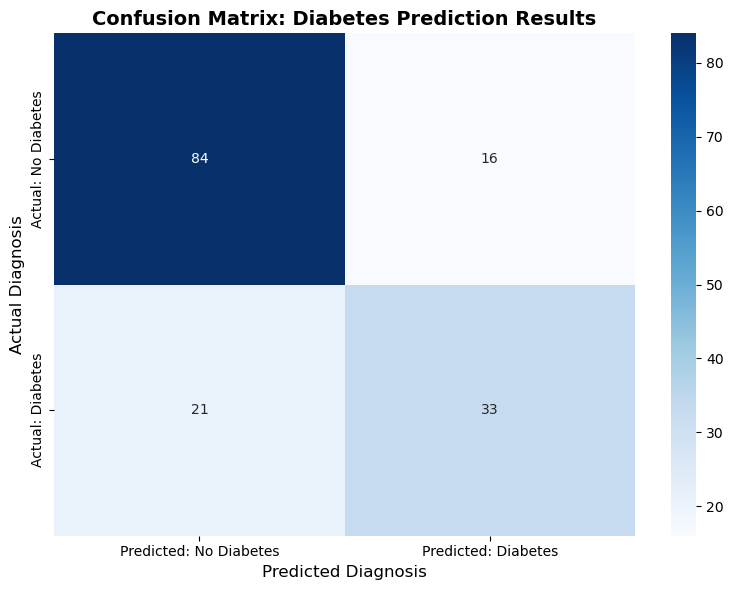

In [150]:
# Create figure for confusion matrix visualization
plt.figure(figsize=(8, 6))
# Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: No Diabetes', 'Predicted: Diabetes'],
            yticklabels=['Actual: No Diabetes', 'Actual: Diabetes'])
# Add title and labels to confusion matrix
plt.title('Confusion Matrix: Diabetes Prediction Results', fontsize=14, fontweight='bold')
plt.ylabel('Actual Diagnosis', fontsize=12)
plt.xlabel('Predicted Diagnosis', fontsize=12)
# Display the confusion matrix plot
plt.tight_layout()
plt.show()

In [151]:
# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()

In [152]:
# Display confusion matrix explanation
print("=== CONFUSION MATRIX EXPLANATION ===")
print(f"True Negatives (TN): {tn} - Correctly identified patients WITHOUT diabetes")

=== CONFUSION MATRIX EXPLANATION ===
True Negatives (TN): 84 - Correctly identified patients WITHOUT diabetes


In [153]:
# Continue confusion matrix explanation
print(f"True Positives (TP): {tp} - Correctly identified patients WITH diabetes")
print(f"False Positives (FP): {fp} - Incorrectly diagnosed diabetes (false alarm)")

True Positives (TP): 33 - Correctly identified patients WITH diabetes
False Positives (FP): 16 - Incorrectly diagnosed diabetes (false alarm)


In [154]:
# Complete confusion matrix explanation
print(f"False Negatives (FN): {fn} - Missed diabetes cases (dangerous!)")

False Negatives (FN): 21 - Missed diabetes cases (dangerous!)


In [155]:
# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

In [156]:
# Display clinical performance metrics
print(f"\n=== CLINICAL PERFORMANCE METRICS ===")
print(f"Sensitivity (True Positive Rate): {sensitivity:.3f} ({sensitivity*100:.1f}%)")


=== CLINICAL PERFORMANCE METRICS ===
Sensitivity (True Positive Rate): 0.611 (61.1%)


In [157]:
# Explain sensitivity
print(f"  - This is the percentage of diabetes cases correctly identified")
print(f"Specificity (True Negative Rate): {specificity:.3f} ({specificity*100:.1f}%)")

  - This is the percentage of diabetes cases correctly identified
Specificity (True Negative Rate): 0.840 (84.0%)


In [158]:
# Explain specificity
print(f"  - This is the percentage of healthy patients correctly identified")

  - This is the percentage of healthy patients correctly identified


## Feature importance analysis

Let's see which medical features are most important for diabetes prediction according to the model.

In [159]:
# Get feature importance scores
feature_importance = model.feature_importances_
feature_names = X.columns

In [160]:
# Create DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

In [161]:
# Sort features by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

In [162]:
# Display feature importance ranking header
print("=== FEATURE IMPORTANCE RANKING ===")
print("Most important medical features for diabetes prediction:")

=== FEATURE IMPORTANCE RANKING ===
Most important medical features for diabetes prediction:


In [163]:
# Display each feature with its importance
for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Importance']:.3f} ({row['Importance']*100:.1f}%)")

1. Glucose: 0.288 (28.8%)
2. BMI: 0.168 (16.8%)
3. DiabetesPedigreeFunction: 0.121 (12.1%)
4. Age: 0.121 (12.1%)
5. Pregnancies: 0.083 (8.3%)
6. BloodPressure: 0.079 (7.9%)
7. Insulin: 0.073 (7.3%)
8. SkinThickness: 0.067 (6.7%)


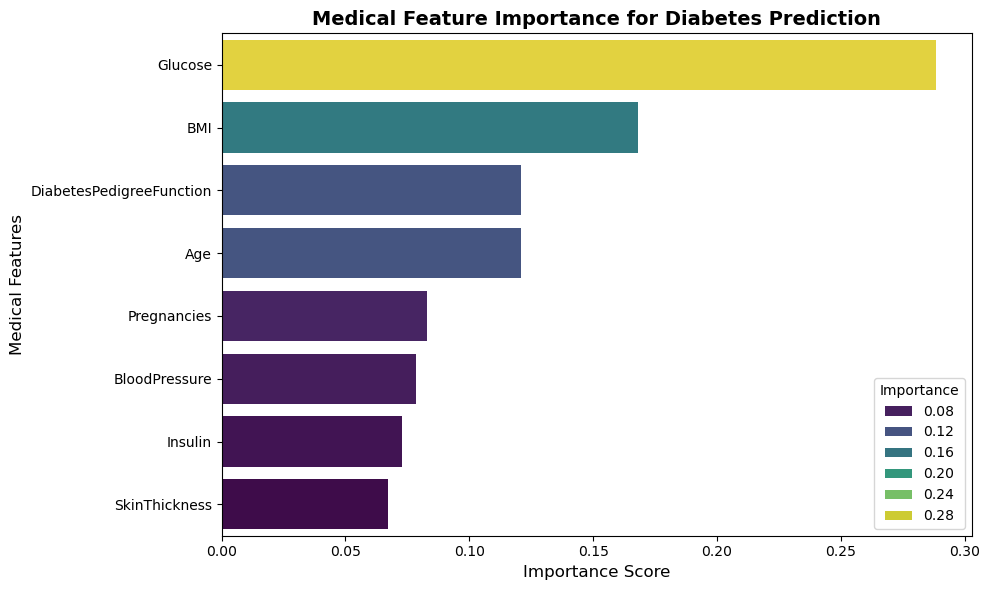

In [164]:
# Create figure for feature importance visualization
plt.figure(figsize=(10, 6))
# Create bar plot for feature importance
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis', hue='Importance')
# Add title and labels to feature importance plot
plt.title('Medical Feature Importance for Diabetes Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Medical Features', fontsize=12)
# Display the feature importance plot
plt.tight_layout()
plt.show()

In [165]:
# Get top 3 most important features
top_3_features = importance_df.head(3)

# Display clinical insights header
print(f"\n=== CLINICAL INSIGHTS ===")
print(f"The top 3 most predictive features are:")

# Display top 3 features with their contributions
for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"{i}. {row['Feature']} (contributes {row['Importance']*100:.1f}% to the prediction)")


=== CLINICAL INSIGHTS ===
The top 3 most predictive features are:
1. Glucose (contributes 28.8% to the prediction)
2. BMI (contributes 16.8% to the prediction)
3. DiabetesPedigreeFunction (contributes 12.1% to the prediction)


## Step 8: Make predictions on new patients

Now let's use the trained model to make predictions for new patients. This simulates how the system would work in a clinical setting.

In [166]:
# Create example patient data for demonstration
new_patients = pd.DataFrame({
    'Pregnancies': [1, 0, 3, 8],
    'Glucose': [85, 180, 110, 190],
    'BloodPressure': [66, 90, 70, 92]
})

In [167]:
# Add remaining patient features
new_patients['SkinThickness'] = [29, 35, 25, 40]
new_patients['Insulin'] = [0, 200, 80, 250]
new_patients['BMI'] = [26.6, 34.5, 28.2, 38.1]

In [168]:
# Complete patient features
new_patients['DiabetesPedigreeFunction'] = [0.351, 0.627, 0.314, 0.835]
new_patients['Age'] = [31, 45, 28, 55]

In [169]:
# Display new patient data header
print("=== NEW PATIENT DATA ===")
print("Medical information for 4 new patients:")

=== NEW PATIENT DATA ===
Medical information for 4 new patients:


In [170]:
# Display the new patient data
new_patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,0,180,90,35,200,34.5,0.627,45
2,3,110,70,25,80,28.2,0.314,28
3,8,190,92,40,250,38.1,0.835,55


In [171]:
# Make predictions for new patients
predictions = model.predict(new_patients)
prediction_probabilities = model.predict_proba(new_patients)

In [172]:
# Display predictions header
print("\n=== DIABETES PREDICTIONS ===")
print()


=== DIABETES PREDICTIONS ===



In [173]:
# Display prediction for first patient
patient_id = 1
prediction = predictions[0]
prob_no_diabetes = prediction_probabilities[0][0]
prob_diabetes = prediction_probabilities[0][1]

In [174]:
# Format and display first patient results
diagnosis = "DIABETES DETECTED" if prediction == 1 else "NO DIABETES"
confidence = max(prob_no_diabetes, prob_diabetes)
print(f"Patient {patient_id}: {diagnosis} (Confidence: {confidence:.1%})")

Patient 1: NO DIABETES (Confidence: 97.7%)


In [175]:
# Display all patient predictions in a loop
for i in range(len(new_patients)):
    patient_id = i + 1
    prediction = predictions[i]
    prob_no_diabetes = prediction_probabilities[i][0]

In [176]:
# Continue displaying predictions for all patients
for i in range(len(new_patients)):
    patient_id = i + 1
    prediction = predictions[i]
    prob_diabetes = prediction_probabilities[i][1]
    diagnosis = "DIABETES DETECTED" if prediction == 1 else "NO DIABETES"

In [177]:
# Display detailed results for each patient
for i in range(len(new_patients)):
    patient_id = i + 1
    prediction = predictions[i]
    prob_no_diabetes = prediction_probabilities[i][0]
    prob_diabetes = prediction_probabilities[i][1]
    
    diagnosis = "DIABETES DETECTED" if prediction == 1 else "NO DIABETES"
    confidence = max(prob_no_diabetes, prob_diabetes)
    
    print(f"Patient {patient_id}:")
    print(f"  Diagnosis: {diagnosis}")
    print(f"  Confidence: {confidence:.1%}")
    print(f"  Probability of No Diabetes: {prob_no_diabetes:.1%}")
    print(f"  Probability of Diabetes: {prob_diabetes:.1%}")
    print()

Patient 1:
  Diagnosis: NO DIABETES
  Confidence: 97.7%
  Probability of No Diabetes: 97.7%
  Probability of Diabetes: 2.3%

Patient 2:
  Diagnosis: DIABETES DETECTED
  Confidence: 81.3%
  Probability of No Diabetes: 18.7%
  Probability of Diabetes: 81.3%

Patient 3:
  Diagnosis: NO DIABETES
  Confidence: 85.4%
  Probability of No Diabetes: 85.4%
  Probability of Diabetes: 14.6%

Patient 4:
  Diagnosis: DIABETES DETECTED
  Confidence: 95.7%
  Probability of No Diabetes: 4.3%
  Probability of Diabetes: 95.7%



## Interactive prediction function

Here's a function that medical professionals can use to make predictions for individual patients by entering their medical measurements.

In [178]:
# Define prediction function for individual patients
def predict_diabetes_for_patient(pregnancies, glucose, blood_pressure, skin_thickness, 
                               insulin, bmi, diabetes_pedigree, age):
    # Create DataFrame with patient data
    patient_data = pd.DataFrame({
        'Pregnancies': [pregnancies], 'Glucose': [glucose], 'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness], 'Insulin': [insulin], 'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree], 'Age': [age]
    })
    
    # Make prediction and get probabilities
    prediction = model.predict(patient_data)[0]
    probabilities = model.predict_proba(patient_data)[0]
    
    # Format and display results
    diagnosis = "DIABETES DETECTED" if prediction == 1 else "NO DIABETES DETECTED"
    confidence = max(probabilities)
    
    print("=== PATIENT DIAGNOSIS REPORT ===")
    print(f"Diagnosis: {diagnosis}")
    print(f"Confidence Level: {confidence:.1%}")
    print(f"Probability of No Diabetes: {probabilities[0]:.1%}")
    print(f"Probability of Diabetes: {probabilities[1]:.1%}")
    
    if prediction == 1:
        print("\nCLINICAL RECOMMENDATION: Further medical evaluation recommended.")
    else:
        print("\nCLINICAL RECOMMENDATION: Continue routine monitoring.")
    
    return prediction, probabilities

In [179]:
# Display example usage header
print("=== EXAMPLE: PREDICTING FOR A SAMPLE PATIENT ===")
print("Patient Profile: 35-year-old female, 2 pregnancies, glucose=120, BMI=28.5")

=== EXAMPLE: PREDICTING FOR A SAMPLE PATIENT ===
Patient Profile: 35-year-old female, 2 pregnancies, glucose=120, BMI=28.5


In [180]:
# Use the prediction function with example patient data
result = predict_diabetes_for_patient(
    pregnancies=2, glucose=120, blood_pressure=75, skin_thickness=25,
    insulin=100, bmi=28.5, diabetes_pedigree=0.4, age=35
)

=== PATIENT DIAGNOSIS REPORT ===
Diagnosis: NO DIABETES DETECTED
Confidence Level: 64.9%
Probability of No Diabetes: 64.9%
Probability of Diabetes: 35.1%

CLINICAL RECOMMENDATION: Continue routine monitoring.


## Summary and clinical applications

Let's summarize what you've accomplished in this lab and discuss clinical applications.

In [181]:
# Display lab summary header
print("=== LAB SUMMARY ===")
print("\nSuccessfully completed all lab objectives:")

=== LAB SUMMARY ===

Successfully completed all lab objectives:


In [182]:
# Summarize dataset loading accomplishment
print("\n1. DATASET LOADING:")
print(f"   - Loaded {len(diabetes_data)} patient records from csv file")
print(f"   - Dataset contains {len(diabetes_data.columns)-1} medical features")


1. DATASET LOADING:
   - Loaded 768 patient records from csv file
   - Dataset contains 8 medical features


In [183]:
# Summarize data exploration
print("\n2. DATA EXPLORATION:")
print("   - Displayed and analyzed patient data structure")
print("   - Identified data quality and distribution")


2. DATA EXPLORATION:
   - Displayed and analyzed patient data structure
   - Identified data quality and distribution


In [184]:
# Summarize feature identification
print("\n3. FEATURE IDENTIFICATION:")
print(f"   - Input features (X): {len(X.columns)} medical measurements")
print("   - Target variable (y): Diabetes diagnosis (0/1)")


3. FEATURE IDENTIFICATION:
   - Input features (X): 8 medical measurements
   - Target variable (y): Diabetes diagnosis (0/1)


In [185]:
# Summarize algorithm selection and training
print("\n4. ALGORITHM SELECTION:")
print("   - Chose Random Forest Classifier")
print("   - Configured for medical diagnosis accuracy")


4. ALGORITHM SELECTION:
   - Chose Random Forest Classifier
   - Configured for medical diagnosis accuracy


In [186]:
# Summarize model training
print("\n5. MODEL TRAINING:")
print(f"   - Trained on {len(X_train)} patient records")
print("   - Used 100 decision trees for robust predictions")


5. MODEL TRAINING:
   - Trained on 614 patient records
   - Used 100 decision trees for robust predictions


In [187]:
# Summarize performance evaluation
print("\n6. PERFORMANCE EVALUATION:")
print(f"   - Overall accuracy: {accuracy:.1%}")
print(f"   - Sensitivity: {sensitivity:.1%} (diabetes detection rate)")
print(f"   - Specificity: {specificity:.1%} (healthy patient identification)")


6. PERFORMANCE EVALUATION:
   - Overall accuracy: 76.0%
   - Sensitivity: 61.1% (diabetes detection rate)
   - Specificity: 84.0% (healthy patient identification)


In [188]:
# Summarize prediction capability
print("\n7. PREDICTION CAPABILITY:")
print("   - Successfully demonstrated predictions on new patients")
print("   - Provided probability scores for clinical decision-making")


7. PREDICTION CAPABILITY:
   - Successfully demonstrated predictions on new patients
   - Provided probability scores for clinical decision-making


In [189]:
# Display clinical applications
print("\n=== CLINICAL APPLICATIONS ===")
print("\nThis diabetes prediction model can assist medical professionals by:")


=== CLINICAL APPLICATIONS ===

This diabetes prediction model can assist medical professionals by:


In [190]:
# List clinical applications
print("\n• SCREENING: Identify high-risk patients during routine checkups")
print("• PRIORITIZATION: Focus resources on patients most likely to have diabetes")
print("• EARLY DETECTION: Catch diabetes cases before symptoms become severe")


• SCREENING: Identify high-risk patients during routine checkups
• PRIORITIZATION: Focus resources on patients most likely to have diabetes
• EARLY DETECTION: Catch diabetes cases before symptoms become severe


In [191]:
# Continue listing clinical applications
print("• DECISION SUPPORT: Provide data-driven insights alongside clinical judgment")
print("• POPULATION HEALTH: Monitor diabetes prevalence in patient populations")

• DECISION SUPPORT: Provide data-driven insights alongside clinical judgment
• POPULATION HEALTH: Monitor diabetes prevalence in patient populations


In [192]:
# Display important clinical notes
print("\n=== IMPORTANT CLINICAL NOTES ===")
print("\nThis model is a DECISION SUPPORT TOOL, not a replacement for clinical judgment")
print("Always combine AI predictions with comprehensive medical evaluation")


=== IMPORTANT CLINICAL NOTES ===

This model is a DECISION SUPPORT TOOL, not a replacement for clinical judgment
Always combine AI predictions with comprehensive medical evaluation


In [193]:
# Complete clinical notes
print("Consider patient history, symptoms, and additional tests for final diagnosis")
print("Regular model retraining with new data is recommended for optimal performance")

Consider patient history, symptoms, and additional tests for final diagnosis
Regular model retraining with new data is recommended for optimal performance


In [194]:
# Display final completion message
print("\n" + "="*60)
print("LAB COMPLETED SUCCESSFULLY!")
print("You now have a working diabetes prediction system.")
print("="*60)


LAB COMPLETED SUCCESSFULLY!
You now have a working diabetes prediction system.


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


Copyright © 2025 SkillUp Corporation. All rights reserved.
